# Die Schnelle Fourier-Transformation (FFT)

### Abtasten eines Audiosignals

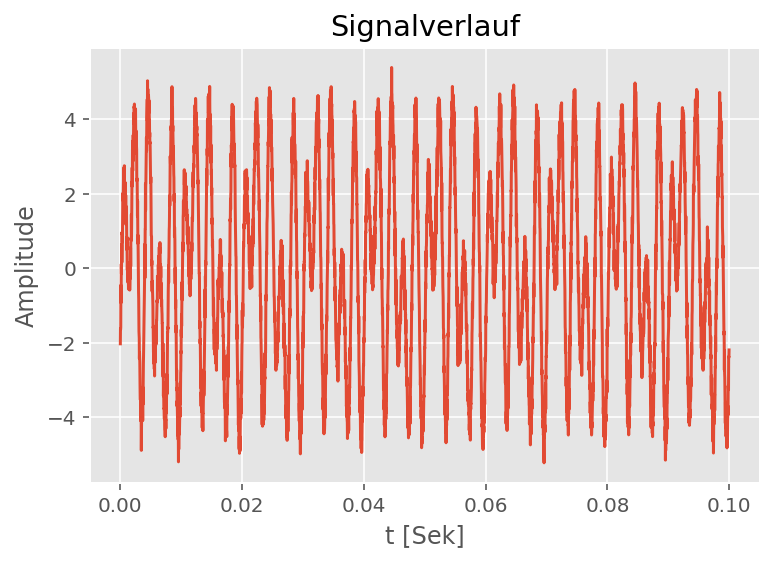

In [58]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')

# Sampling 
Fs = 44100   # Abtastrate / sampling rate [Hz]
T = 1/Fs     # Abtastinterval 
t = 0.1      # Abtastdauer
N = Fs*t     # Anzahl Abtastpunkte 

# Signal
freq = 100           # Signalfrequenz [Hz]
omega = 2*np.pi*freq # Winkelfrequenz

# Graphen aufstellen
t_vek = np.arange(N)*T
y = np.sin(omega*t_vec)  + -2*np.cos(3*omega*t_vec)  + 3*np.sin(5*omega*t_vec)  + 0.25*np.random.randn(len(t_vek))

plt.plot(t_vek,y)
plt.ylabel('Amplitude')
plt.xlabel('t [Sek]')
plt.title("Signalverlauf")
plt.show()

### FFT (Schnelle Fourier-Trafo)

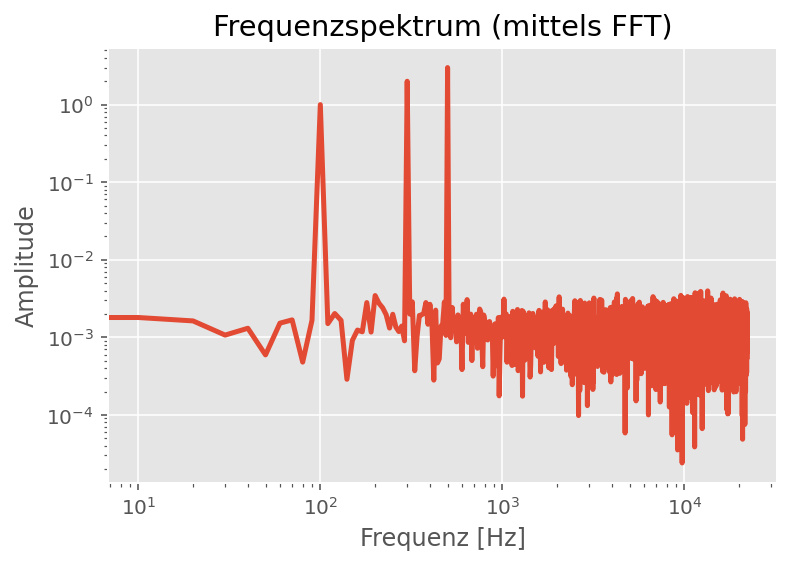

In [56]:
Y_k = np.fft.fft(y)[0:int(N/2)]/N    # FFT-Funktion (numpy-Package)
Y_k[1:] = 2*Y_k[1:]                  # need to take the single-sided spectrum only
Ampl = np.abs(Y_k)                   # Amplitude / Spektrum: Betrag der FFT-Funktion

f = Fs*np.arange((N/2))/N;           # Frequenzvektor (für Graphen)

# Graphen aufstellen
fig,ax = plt.subplots()
plt.plot(f,Ampl,linewidth=2.5)
ax.set_xscale('log')
ax.set_yscale('log')
plt.ylabel('Amplitude')
plt.xlabel('Frequenz [Hz]')
plt.title("Frequenzspektrum (mittels FFT)")
plt.show()